van der Waals's Equation of State
==
This notebook intends to present van der Waals's Equation of State([wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation),[nobel prize lecture](http://www.nobelprize.org/nobel_prizes/physics/laureates/1910/waals-lecture.pdf)), and to represent its results in a graphical manner.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as numpy
import matplotlib as matplotlib

In [3]:
#input

R = 0.08314

#select EoS
ede = 'PR'

#substance name
subs='hexano'

#pure component parameter
##Tc (K)
Tc = 507.5
##Pc (bar)
Pc = 30.1
#ac
ac=0.299

In [4]:
#defien two EoS

#define function to calp Pressure from T and V according to SRK(ref)
def SRK(T,Vm):
    alfa=(1.+(0.48508+1.55171*ac-0.17613*ac*ac)*(1-((T/Tc)**0.5)))**2.
    a=alfa*0.42747*R*R*Tc*Tc/Pc
    b=0.08664*R*Tc/Pc
    P=R*T/(Vm-b) - a/(Vm*(Vm+b))
    return P
        
#define function to calp Pressure from T and V according to PR(ref)
def PR(T,Vm):
    alfa = (1+(0.37464+1.54226*ac-0.26992*ac*ac)*(1-(T/Tc)**0.5))**2
    a =alfa* 0.45724*R*R*Tc*Tc/Pc
    b = 0.0778*R*Tc/Pc
    P = R*T/(Vm-b) - a/(Vm*Vm+2*b*Vm-b*b)
    return P

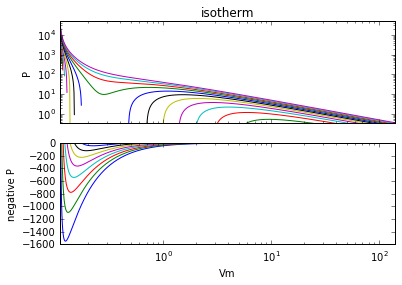

In [5]:


legend=[]

for T in numpy.arange(77.5, 677.5, 50):
    
    #array of values for volume
    Vmi = numpy.arange(0.0778*R*Tc/Pc*1.01,(R*Tc/Pc)*100.,0.0778*R*Tc/Pc*0.01)
    
    if ede =='PR':
        matplotlib.pyplot.figure(1) #activate
        matplotlib.pyplot.subplot(211) #activate
        
        matplotlib.pyplot.loglog(Vmi,PR(T,Vmi), label=str(T)+'K')
        matplotlib.pyplot.ylabel('P')
        matplotlib.pyplot.title('isotherm')
        matplotlib.pyplot.ylim([PR(T,(R*Tc/Pc)*100.),PR(T,0.0778*R*Tc/Pc*1.01)])
        matplotlib.pyplot.xlim([0.0778*R*Tc/Pc*1.01,(R*Tc/Pc)*100.])

        matplotlib.pyplot.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='on',      # ticks along the bottom edge are off
        top='on',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
        
        matplotlib.pyplot.subplot(212) #activate
        
        matplotlib.pyplot.semilogx(Vmi,PR(T,Vmi), label=str(T)+'K')
        matplotlib.pyplot.xlabel('Vm')
        matplotlib.pyplot.ylabel('negative P')
        matplotlib.pyplot.ylim([-1600,0.])
        matplotlib.pyplot.xlim([0.0778*R*Tc/Pc*1.01,(R*Tc/Pc)*100.])
        
#matplotlib.pyplot.legend(loc=0)       
matplotlib.pyplot.show() 


# External references:
matplotlib, pyplot [tutorial](http://matplotlib.org/users/pyplot_tutorial.html)

# Credits
* Initially developed in python 2.7 by Guilherme Carneiro Queiroz da Silva
* Adapted to ipynb with python 3.5 by Iuri Soter Viana Segtovich